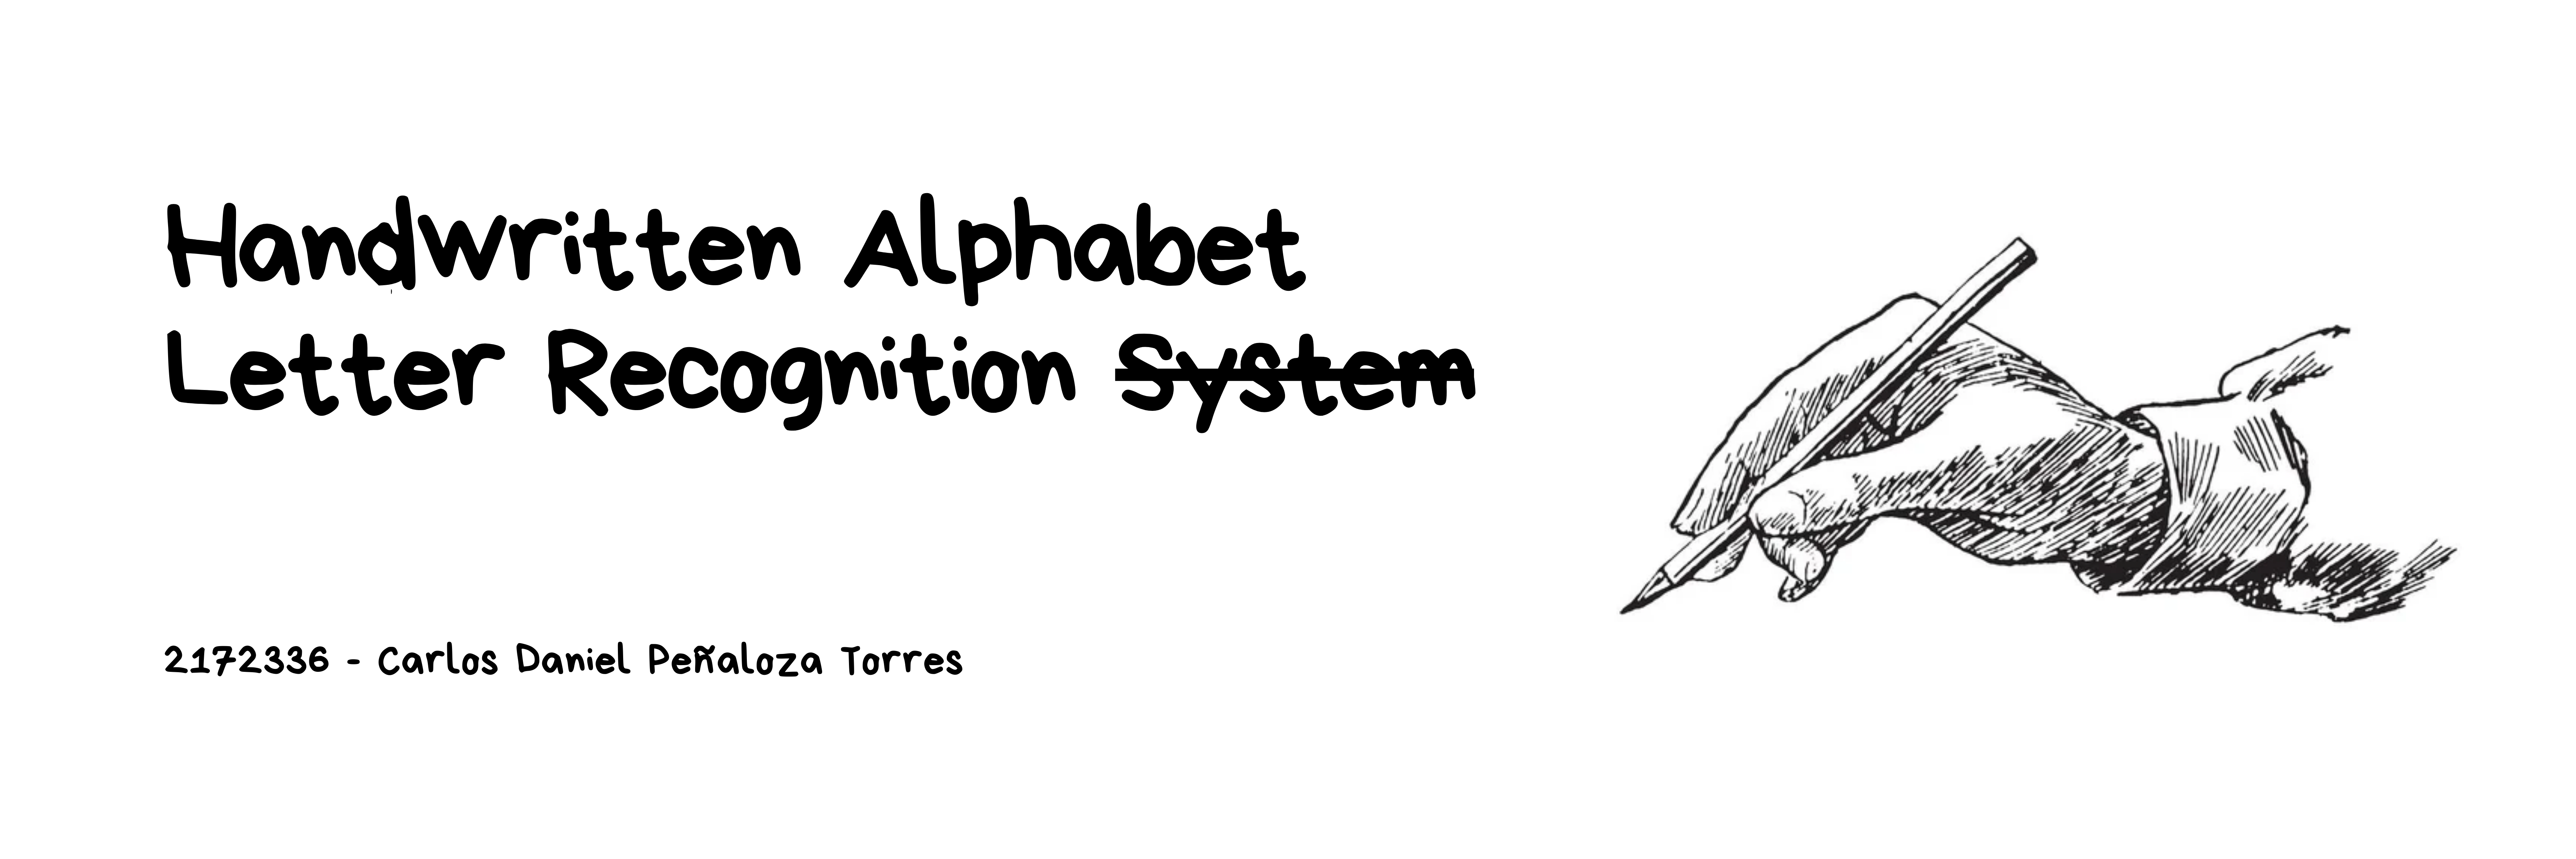

## A-Z-Handwritten Alphabets DataSet

## Introducción
Este dataset consiste en una colección de imágenes digitales de 28x28 píxeles que contienen letras escritas a mano. Cada imagen representa una unica letra del alfabeto.

## Detalles del Dataset
- **Tamaño del Dataset**: El dataset contiene un total de 372450 imágenes.
- **Resolución de Imagen**: Cada imagen tiene una resolución de 28x28 píxeles.
- **Clases Objetivo**: El dataset se divide en 26 clases objetivo, una para cada letra del alfabeto.
- **Formato de Datos**: Las imágenes se almacenan en formato de lista de 784 columnas y 1 columna de etiqueta.

## Uso Potencial
Este dataset es ampliamente utilizado para entrenar y evaluar algoritmos de reconocimiento de caracteres manuscritos y para la construcción de modelos de clasificación. Algunas aplicaciones comunes incluyen:

- Desarrollo de sistemas de reconocimiento de escritura a mano.
- Detección de letras en formularios escritos a mano.
- Automatización de la lectura de letras escritas a mano en documentos.
[A-Z Handwritten Alphabets in .csv format](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format)

In [6]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt


from tensorflow import keras
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle

sns.set_theme()

In [47]:
drive.mount("/content/drive");
os.chdir("/content/drive/My Drive/IA-2023-2/Project");
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 A_Z_Handwritten_Alphabets.ipynb  'A_Z Handwritten Data.csv'


In [8]:
dataset = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


In [10]:
dataset.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [11]:
dataset.rename(columns={'0':'label'}, inplace=True)

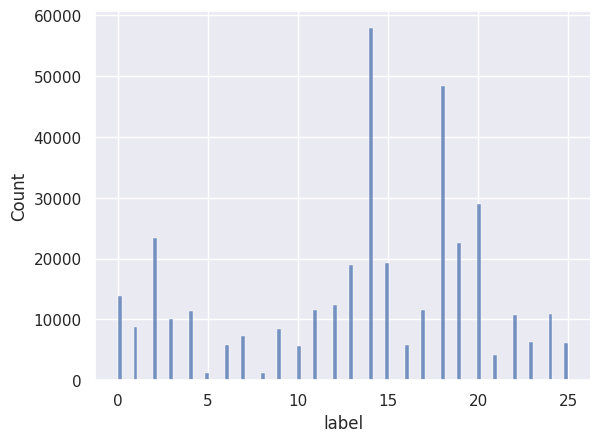

In [12]:
sns.histplot(dataset.label);

In [13]:
# Split data and labels

X = dataset.drop(columns = ['label'])
y = dataset['label']

In [14]:
# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

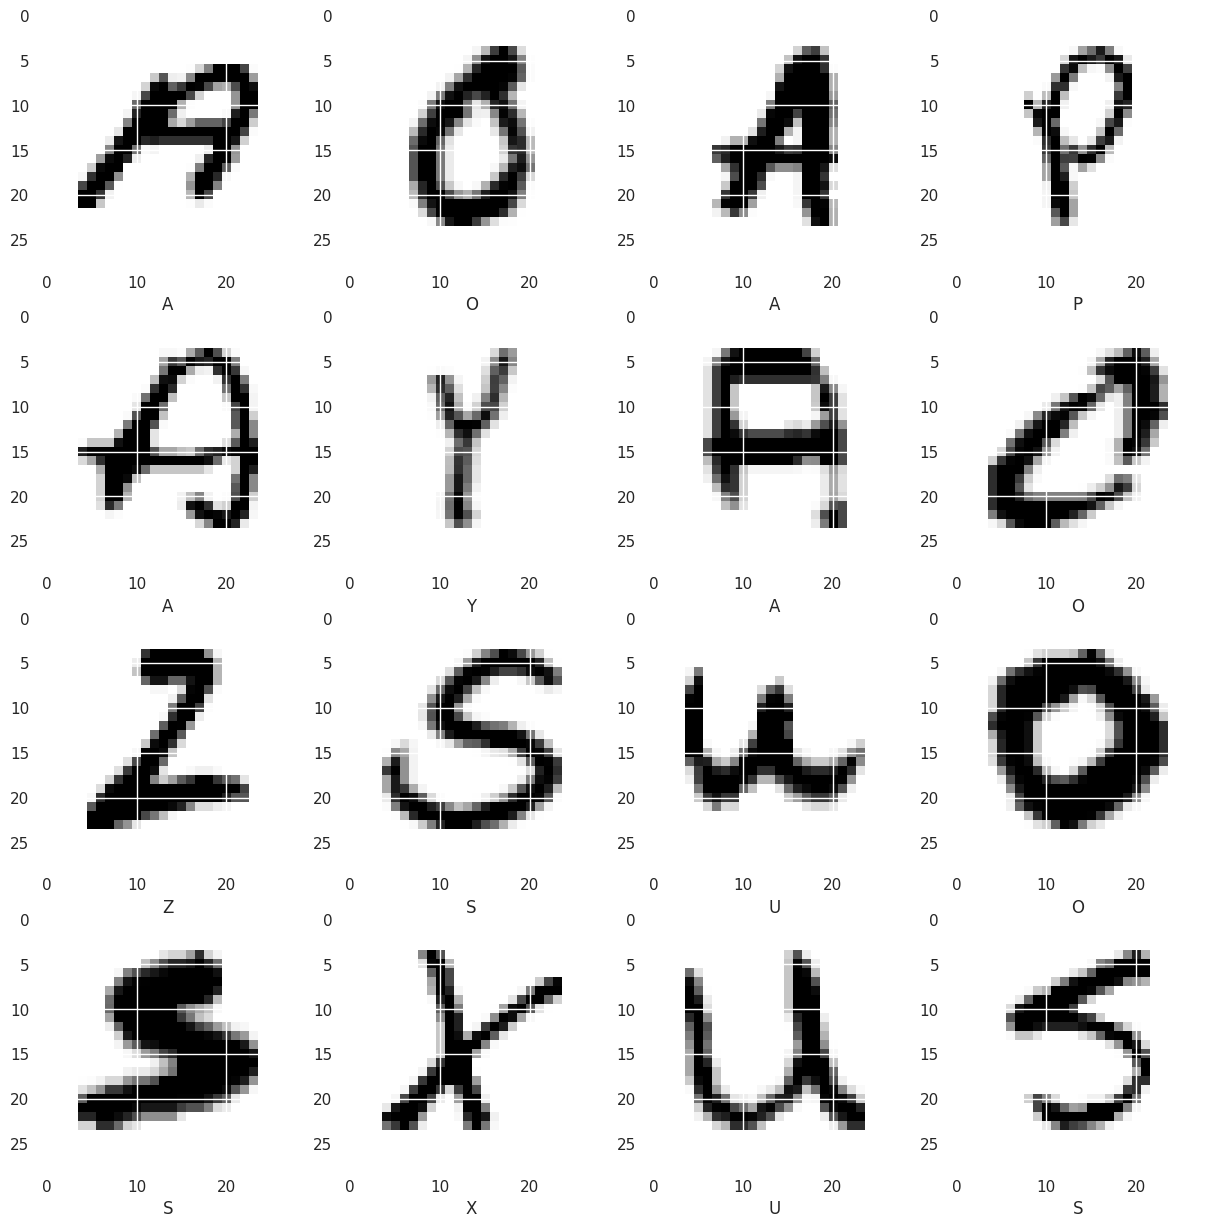

In [15]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

plt.figure(figsize = (15,15))
row, colums = 4, 4
for i in range(16):
    plt.subplot(colums, row, i+1)
    plt.imshow(X_train.values[i].reshape(28,28),interpolation='nearest', cmap='Greys')
    plt.xlabel(word_dict[y_train.values[i]])
plt.show()

# Gaussian Naive Bayes Model

In [16]:
# GaussianNB model
naive_bayes_model = GaussianNB()

In [17]:
# Training the GaussianNB model
naive_bayes_model.fit(X_train, y_train);

In [18]:
# Saving the prediction set
naive_bayes_pred = naive_bayes_model.predict(X_test)

In [19]:
# Geting the accuracy_score
print(accuracy_score(naive_bayes_pred, y_test))

0.5570143643442073


In [20]:
# Geting the classification Report
print(classification_report(y_test,naive_bayes_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.01      0.02      2774
         1.0       0.27      0.77      0.40      1734
         2.0       0.90      0.67      0.76      4682
         3.0       0.75      0.38      0.50      2027
         4.0       0.41      0.61      0.49      2288
         5.0       0.82      0.78      0.80       233
         6.0       0.30      0.83      0.44      1152
         7.0       0.17      0.63      0.27      1444
         8.0       0.58      0.75      0.65       224
         9.0       0.00      0.00      0.00      1699
        10.0       0.00      0.00      0.00      1121
        11.0       0.51      0.86      0.64      2317
        12.0       0.72      0.81      0.77      2467
        13.0       0.57      0.44      0.50      3802
        14.0       0.79      0.90      0.84     11565
        15.0       1.00      0.00      0.00      3868
        16.0       0.62      0.35      0.45      1162
        17.0       0.90    

<Axes: >

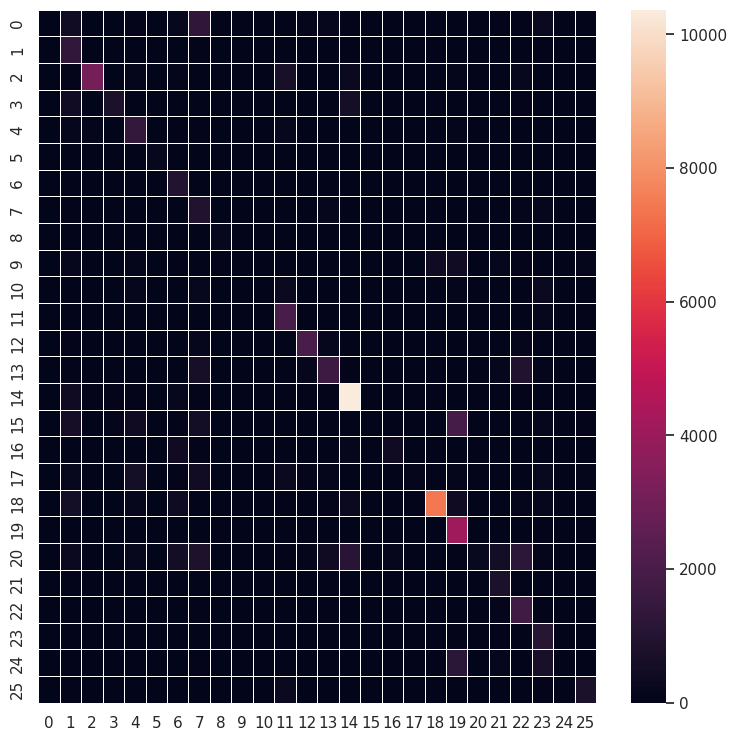

In [21]:
# Geting the confusion matrix
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, naive_bayes_pred), linewidths=.5,ax=ax)

# Decision Tree Classifier

In [22]:
# DecisionTreeClassifier model
# max_depth = 60

decision_tree_model = DecisionTreeClassifier(max_depth=60)

In [23]:
# Training the DecisionTreeClassifier model
decision_tree_model.fit(X_train,y_train);

In [24]:
# Saving the prediction set
decision_tree_pred = decision_tree_model.predict(X_test)

In [25]:
# Geting the accuracy_score
print(accuracy_score(decision_tree_pred, y_test))

0.9556853268895154


In [26]:
# Geting the classification Report
print(classification_report(y_test,decision_tree_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2774
         1.0       0.91      0.89      0.90      1734
         2.0       0.97      0.98      0.97      4682
         3.0       0.92      0.92      0.92      2027
         4.0       0.94      0.93      0.94      2288
         5.0       0.88      0.82      0.85       233
         6.0       0.90      0.90      0.90      1152
         7.0       0.89      0.90      0.90      1444
         8.0       0.95      0.84      0.89       224
         9.0       0.93      0.94      0.94      1699
        10.0       0.89      0.89      0.89      1121
        11.0       0.97      0.98      0.97      2317
        12.0       0.95      0.89      0.92      2467
        13.0       0.94      0.95      0.95      3802
        14.0       0.98      0.98      0.98     11565
        15.0       0.97      0.97      0.97      3868
        16.0       0.89      0.88      0.88      1162
        17.0       0.93    

<Axes: >

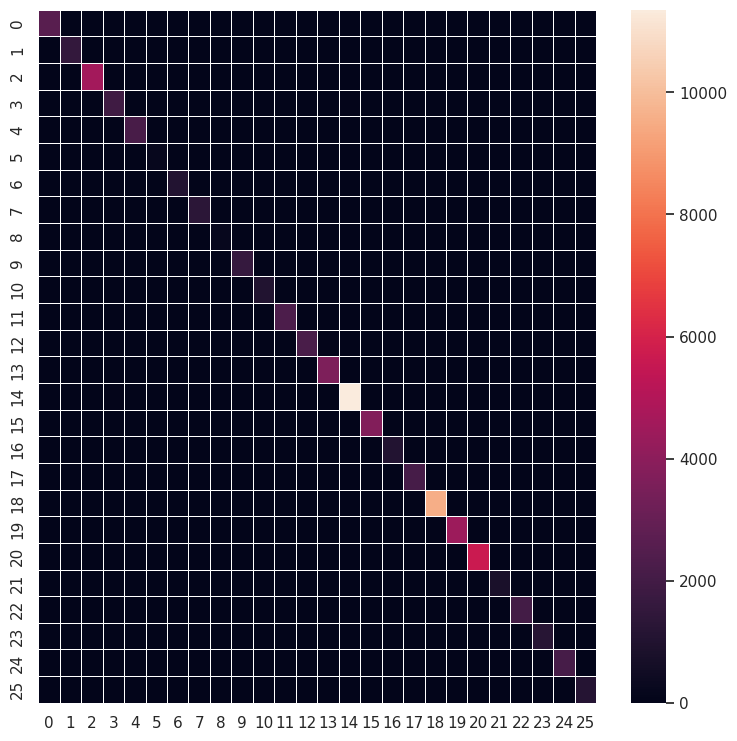

In [27]:
# Geting the confusion matrix
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, decision_tree_pred), linewidths=.5,ax=ax)

# Random Forest Classifier

In [28]:
# RandomForestClassifier model
# n_estimators = 20

random_forest_model = RandomForestClassifier(n_estimators=20)

In [29]:
# Training the RandomForestClassifier model
random_forest_model.fit(X_train, y_train);

In [30]:
# Saving the prediction set
random_forest_pred = random_forest_model.predict(X_test)

In [31]:
# Geting the accuracy_score
print(accuracy_score(random_forest_pred, y_test))

0.9846019599946302


In [32]:
# Geting the classification Report
print(classification_report(y_test,random_forest_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2774
         1.0       0.98      0.95      0.97      1734
         2.0       0.99      1.00      0.99      4682
         3.0       0.97      0.97      0.97      2027
         4.0       0.99      0.98      0.98      2288
         5.0       1.00      0.92      0.96       233
         6.0       0.99      0.95      0.97      1152
         7.0       0.97      0.96      0.97      1444
         8.0       1.00      0.93      0.97       224
         9.0       0.98      0.97      0.97      1699
        10.0       0.98      0.96      0.97      1121
        11.0       0.99      1.00      0.99      2317
        12.0       0.99      0.96      0.98      2467
        13.0       0.97      0.99      0.98      3802
        14.0       0.99      1.00      0.99     11565
        15.0       0.99      0.99      0.99      3868
        16.0       0.99      0.93      0.96      1162
        17.0       0.98    

<Axes: >

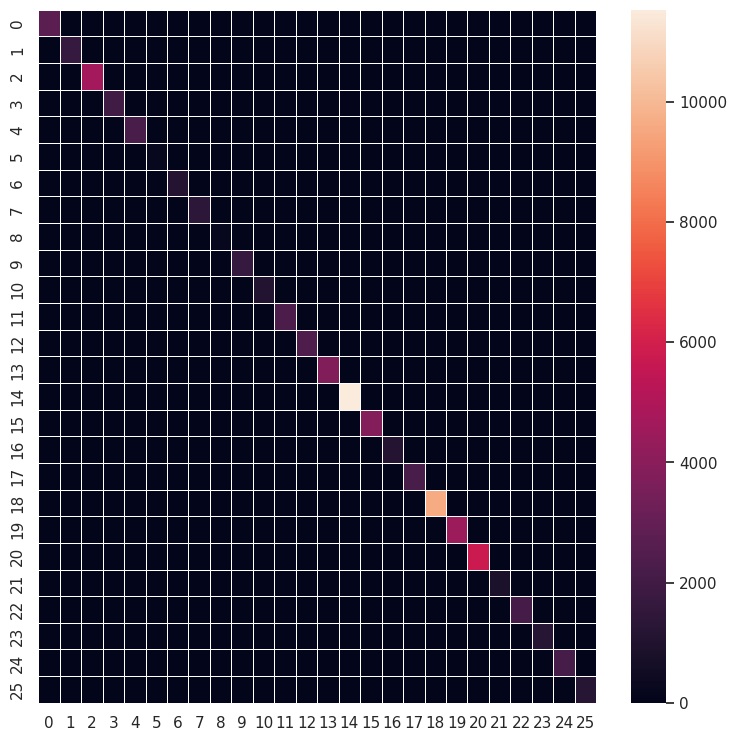

In [33]:
# Geting the confusion matrix
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, random_forest_pred), linewidths=.5,ax=ax)

# Support vector machine

In [34]:
# SVC model
# support_vector_machine_model = LinearSVC(dual=False)

In [35]:
# Training the SVC model
# support_vector_machine_model.fit(X_train, y_train);

In [36]:
# Saving the prediction set
# support_vector_machine_pred = support_vector_machine_model.predict(X_test)

In [37]:
# Geting the accuracy_score
# print(accuracy_score(support_vector_machine_pred, y_test))

In [38]:
# Geting the classification Report
# print(classification_report(y_test,support_vector_machine_pred))

In [39]:
# Geting the confusion matrix
# fig, ax = plt.subplots(figsize=(9,9))
# sns.heatmap(confusion_matrix(y_test, support_vector_machine_pred), linewidths=.5,ax=ax)

#  Deep Learning

In [40]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

X = X/255
X = X.values.reshape(X.shape[0], 28, 28)

# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42, shuffle=True)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[28, 28, 1]),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 26)                3354      
                                                                 
Total params: 237210 (926.60 KB)
Trainable params: 237210 (926.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
9312/9312 [==============================] - 41s 4ms/step - loss: 0.2093 - accuracy: 0.9399
Epoch 2/5
9312/9312 [==============================] - 36s 4ms/step - loss: 0.0954 - accuracy: 0.9720
Epoch 3/5
9312/9312 [==============================] - 33s 4ms/step - loss: 0.0710 - accuracy: 0.9788
Epoch 4/5
9312/9312 [==============================] - 33s 4ms/step - loss: 0.0578 - accuracy: 0.9823
Epoch 5/5
9312/9312 [==============================] - 33s 4ms/step - loss: 0.0487 - accuracy: 0.9853


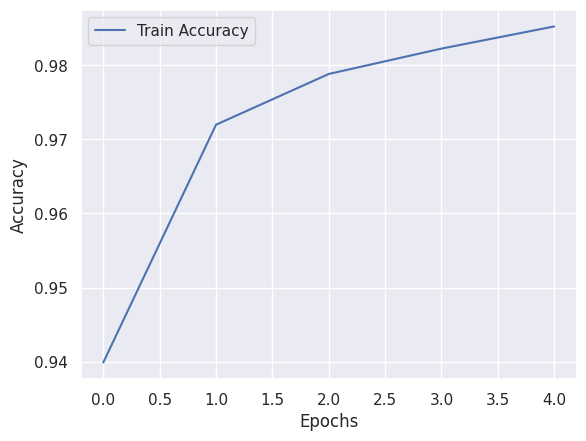

In [42]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

2328/2328 [==============================] - 8s 3ms/step - loss: 0.0655 - accuracy: 0.9826
Test accuracy: 0.9825748205184937


In [44]:
predictions = model.predict(X_test)
image_index = np.random.randint(X_test.shape[0])

print("Valor predicho:",  np.argmax(predictions[image_index]), " - max prob: ", np.max(predictions[image_index])," - Valor verdadero: ", y_test.values[image_index] )


2328/2328 [==============================] - 4s 2ms/step
Valor predicho: 24  - max prob:  0.9999963  - Valor verdadero:  24.0


1/1 [==============================] - 0s 62ms/step
La letra predicha es:  O


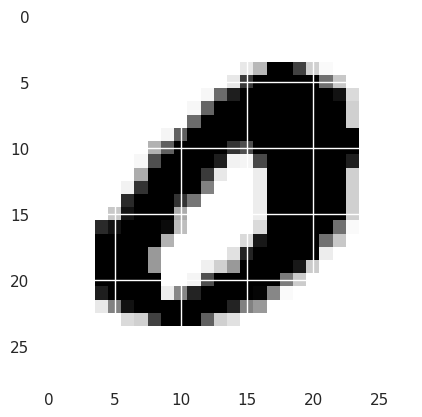

In [45]:
image_index = np.random.randint(X_test.shape[0])


plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("La letra predicha es: ", word_dict[pred.argmax()])

<Axes: >

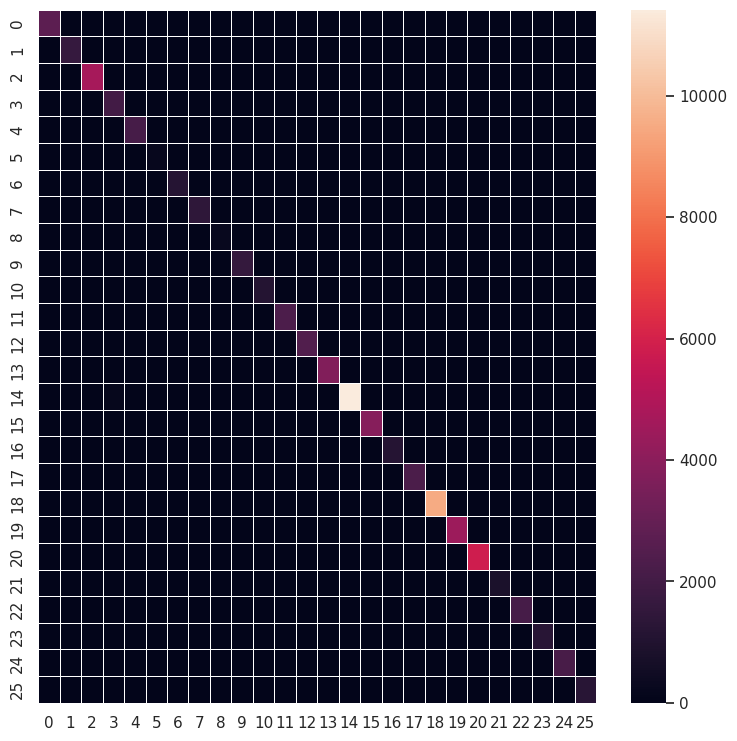

In [46]:
labels_pred = np.argmax(predictions, axis=1)
cm_test = confusion_matrix(y_test, labels_pred)


fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm_test, linewidths=.5,ax=ax)